## The Supermarket dataset comprises of details about the quantity of goods sold, gross income and customer ratings in the first 3 months of year 2019.
## Visualisations and Clustering approach with PCA is carried out to study the customer behavior or retail pattern.
## Model performance evaluation done with the required metrics.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [80]:
# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA
# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier and random forest classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df1=pd.read_csv('supermarket_sales.csv')
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df1.shape

(1000, 17)

In [7]:
df1.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df1.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [3]:
df1['Date']=pd.to_datetime(df1['Date']).dt.month
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
df1['Invoice ID'].nunique()

1000

In [4]:
df2=df1.copy()
df2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df2=df2.rename({'Date':'Month'},axis=1)
df2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df2=df2.drop('Time',axis=1)
df2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df2=df2.drop('Invoice ID',axis=1)
df2.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,Ewallet,604.17,4.761905,30.2085,5.3


In [83]:
df2=df2.drop('gross margin percentage',axis=1)
df2.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,Ewallet,604.17,30.2085,5.3


In [13]:
df2['Month']=df2['Month'].astype('object')
df2.dtypes

Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Month                       object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [14]:
dfcat=df2.select_dtypes(include='object')
dfcat.head()

,Branch,City,Customer type,Gender,Product line,Month,Payment
0,A,Yangon,Member,Female,Health and beauty,1,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,3,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,3,Credit card
3,A,Yangon,Member,Male,Health and beauty,1,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,2,Ewallet


In [84]:
dfnum=df2.select_dtypes(include='number')
dfnum.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,30.2085,5.3


In [17]:
df2['gross margin percentage'].nunique()

1

## Univariate Analysis

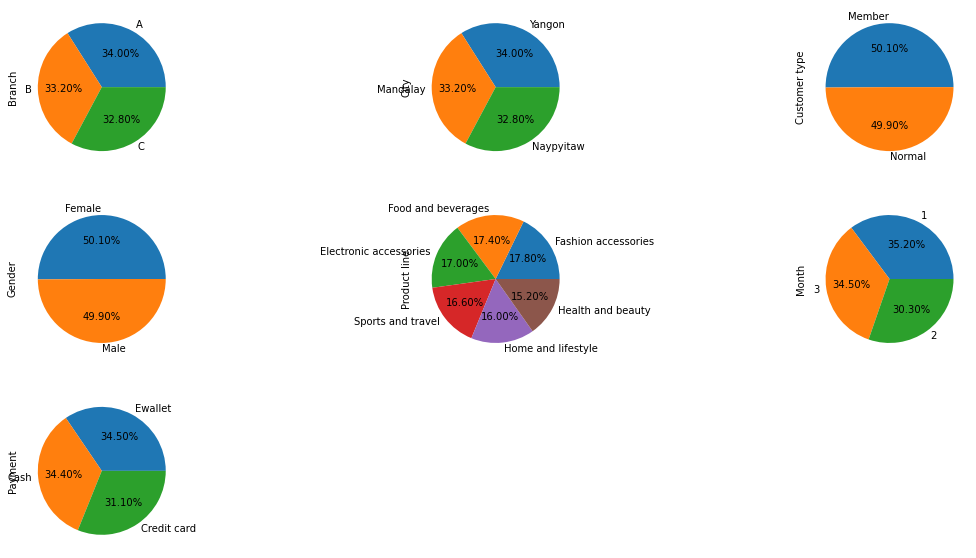

In [53]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
dfcat['Branch'].value_counts().plot(kind='pie',autopct="%1.2f%%")

plt.subplot(3,3,2)
dfcat['City'].value_counts().plot(kind='pie',autopct="%1.2f%%")

plt.subplot(3,3,3)
dfcat['Customer type'].value_counts().plot(kind='pie',autopct="%1.2f%%")

plt.subplot(3,3,4)
dfcat['Gender'].value_counts().plot(kind='pie',autopct="%1.2f%%")

plt.subplot(3,3,5)
dfcat['Product line'].value_counts().plot(kind='pie',autopct="%1.2f%%")

plt.subplot(3,3,6)
dfcat['Month'].value_counts().plot(kind='pie',autopct="%1.2f%%")

plt.subplot(3,3,7)
dfcat['Payment'].value_counts().plot(kind='pie',autopct="%1.2f%%")



## Multivariate Analysis

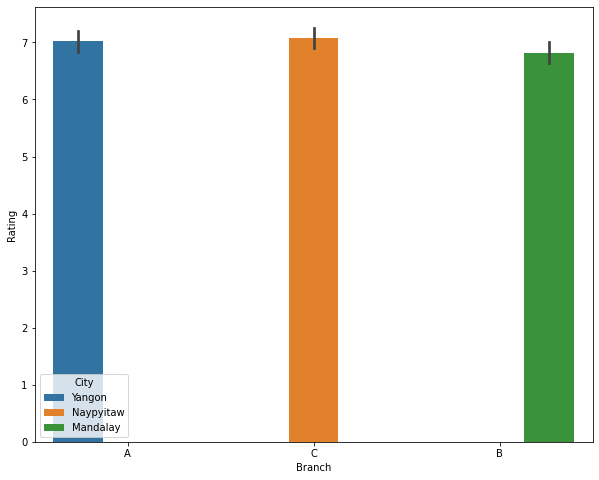

In [40]:
plt.figure(figsize=(10,8))
sns.barplot('Branch','Rating',data=df2,hue='City',)

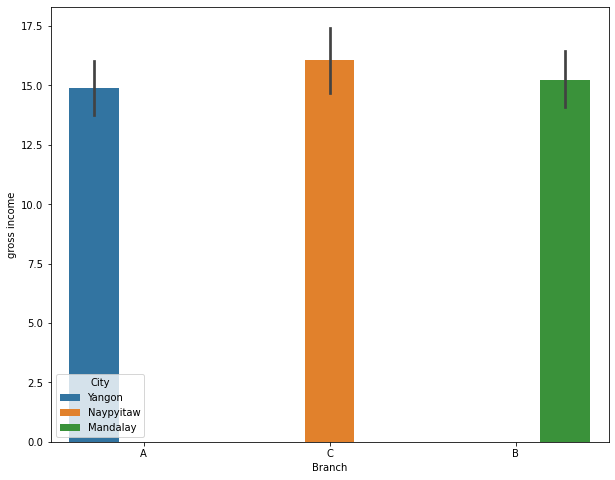

In [59]:
plt.figure(figsize=(10,8))
sns.barplot('Branch','gross income',data=df2,hue='City',)

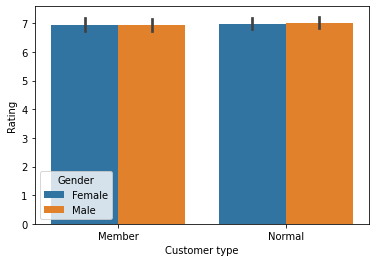

In [55]:
sns.barplot('Customer type','Rating',data=df2,hue='Gender')

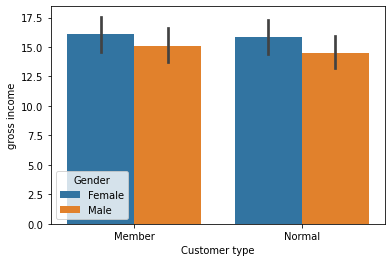

In [60]:
sns.barplot('Customer type','gross income',data=df2,hue='Gender')

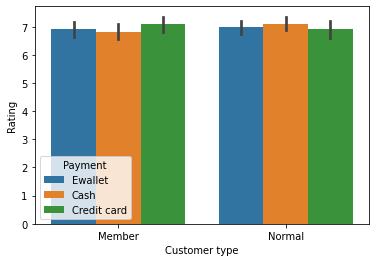

In [56]:
sns.barplot('Customer type','Rating',data=df2,hue='Payment')

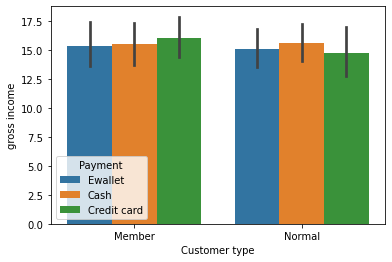

In [61]:
sns.barplot('Customer type','gross income',data=df2,hue='Payment')

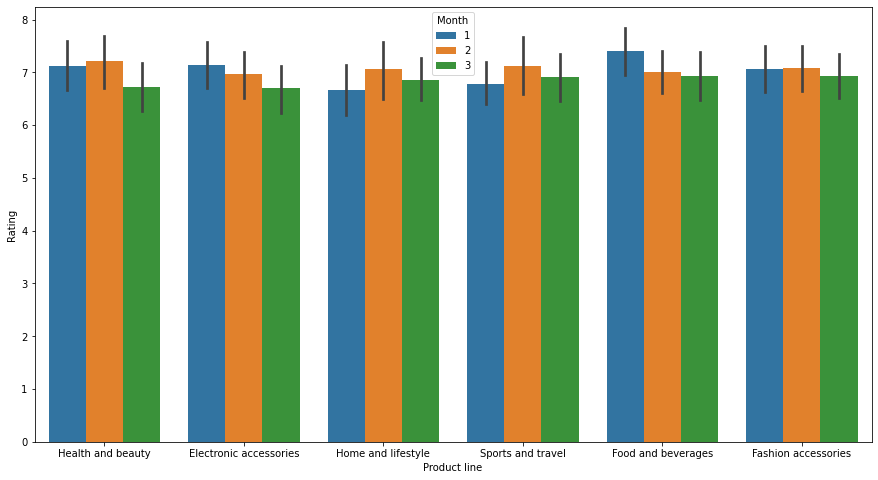

In [58]:
plt.figure(figsize=(15,8))
sns.barplot('Product line','Rating',data=df2,hue='Month')

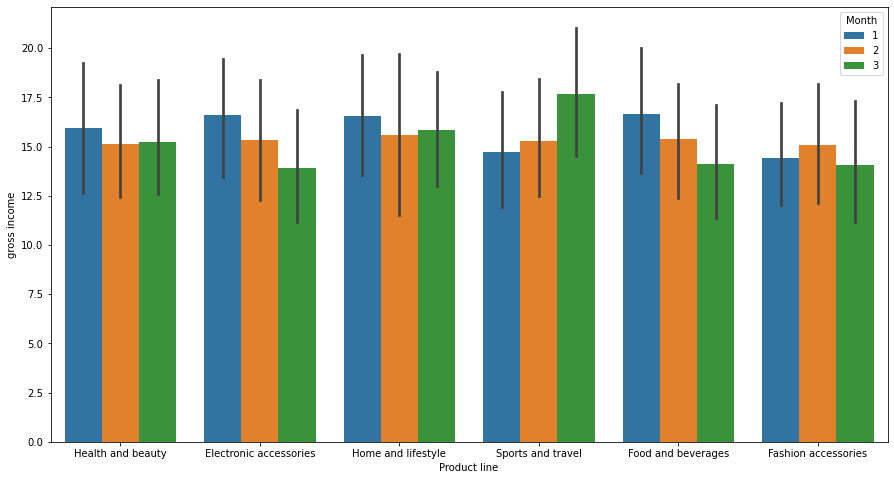

In [64]:
plt.figure(figsize=(15,8))
sns.barplot('Product line','gross income',data=df2,hue='Month')

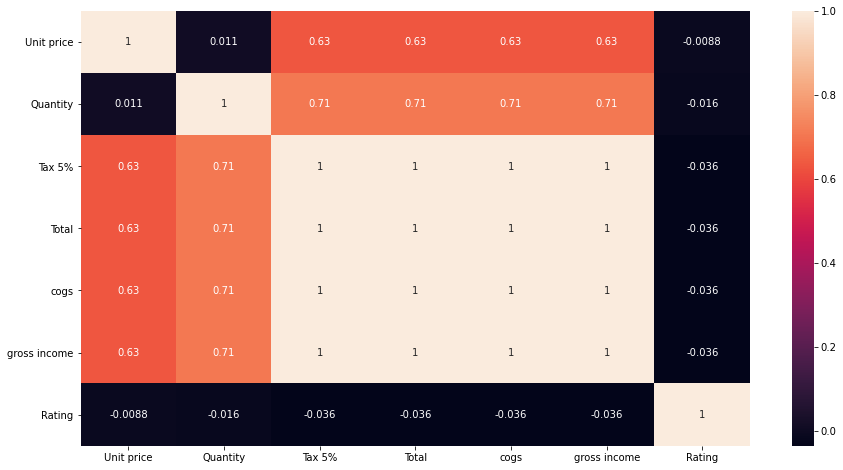

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(),annot=True)

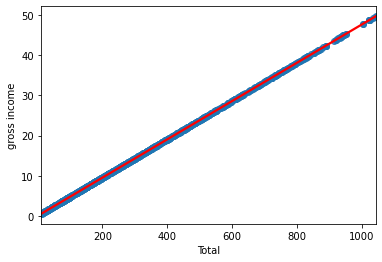

In [75]:
sns.regplot('Total','gross income',data=df2,lowess=True,line_kws={'color':'red'})

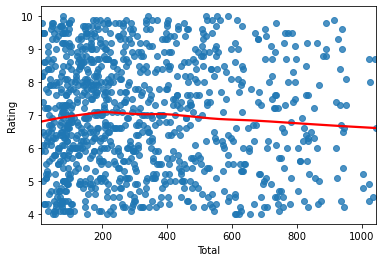

In [76]:
sns.regplot('Total','Rating',data=df2,lowess=True,line_kws={'color':'red'})

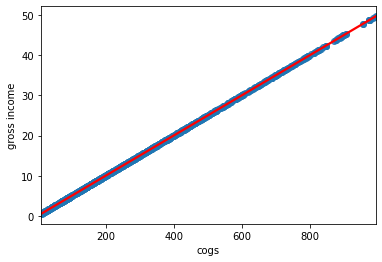

In [77]:
sns.regplot('cogs','gross income',data=df2,lowess=True,line_kws={'color':'red'})

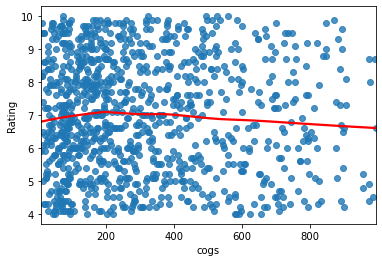

In [78]:
sns.regplot('cogs','Rating',data=df2,lowess=True,line_kws={'color':'red'})

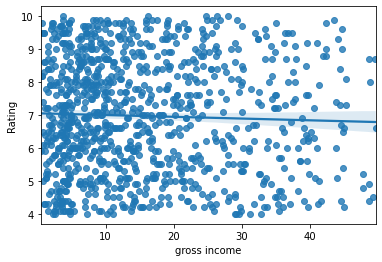

In [88]:
sns.regplot('gross income','Rating',data=df2)

## Scaling of the data

In [81]:
sc=StandardScaler()

In [89]:
dfs=pd.DataFrame(sc.fit_transform(dfnum),columns=dfnum.columns)
dfs.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
0,0.718160,0.509930,0.919607,0.919607,0.919607,0.919607,1.238443
1,-1.525303,-0.174540,-0.987730,-0.987730,-0.987730,-0.987730,1.529527
2,-0.352781,0.509930,0.071446,0.071446,0.071446,0.071446,0.248760
3,0.096214,0.852165,0.675780,0.675780,0.675780,0.675780,0.830927
4,1.156959,0.509930,1.267125,1.267125,1.267125,1.267125,-0.973790


In [91]:
df2.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


In [90]:
dfs.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.187939e-16,5.562217e-17,5.173639e-17,1.878497e-16,-3.663736e-17,5.173639e-17,1.746381e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.721668e+00,-1.543480e+00,-1.270692e+00,-1.270692e+00,-1.270692e+00,-1.270692e+00,-1.730607e+00
25%,-8.608740e-01,-8.590099e-01,-8.078714e-01,-8.078714e-01,-8.078714e-01,-8.078714e-01,-8.573570e-01
50%,-1.669588e-02,-1.745399e-01,-2.812422e-01,-2.812422e-01,-2.812422e-01,-2.812422e-01,1.589315e-02
75%,8.406991e-01,8.521652e-01,6.037682e-01,6.037682e-01,6.037682e-01,6.037682e-01,8.891433e-01
max,1.672416e+00,1.536635e+00,2.928371e+00,2.928371e+00,2.928371e+00,2.928371e+00,1.762394e+00


## K Means Clustering

In [92]:
wcss=[]
for i in range(1,11):
    k1=KMeans(n_clusters=i,random_state=4)
    k1.fit(dfs)
    wcss.append(k1.inertia_)

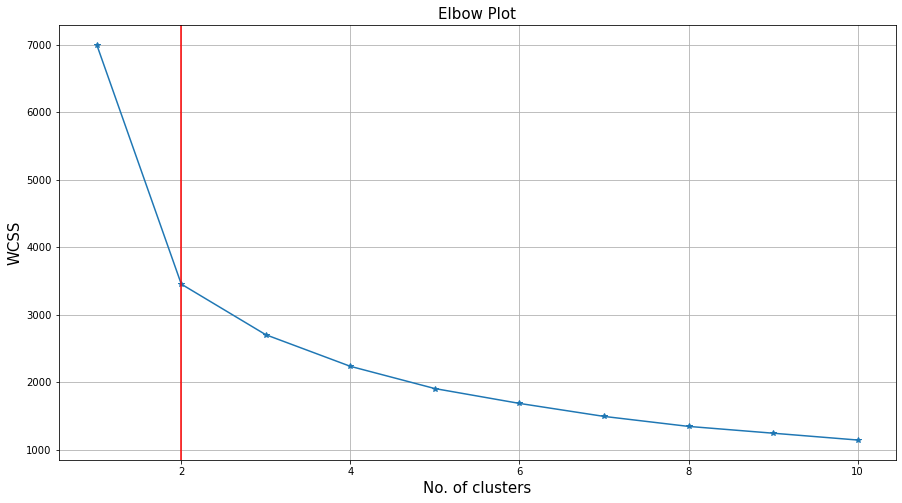

In [94]:
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss,marker="*")
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel("No. of clusters", fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(2,color='red')
plt.grid()
plt.show()

In [95]:
silhouetterange=range(2,11)
scores=[]
for i in silhouetterange:
    k2=KMeans(n_clusters=i,random_state=4)
    k2.fit(dfs)
    labels=k2.labels_
    score = silhouette_score(dfs, labels, random_state= 42)
    scores.append(score)
    print ("For {} clusters the silhouette score is {}".format(i, score))

For 2 clusters the silhouette score is 0.4321249959588462
For 3 clusters the silhouette score is 0.304650899900705
For 4 clusters the silhouette score is 0.2744669601520672
For 5 clusters the silhouette score is 0.273013313682169
For 6 clusters the silhouette score is 0.28142440837768085
For 7 clusters the silhouette score is 0.27864134399301094
For 8 clusters the silhouette score is 0.2819206477529535
For 9 clusters the silhouette score is 0.2737903470752252
For 10 clusters the silhouette score is 0.27763650057580436


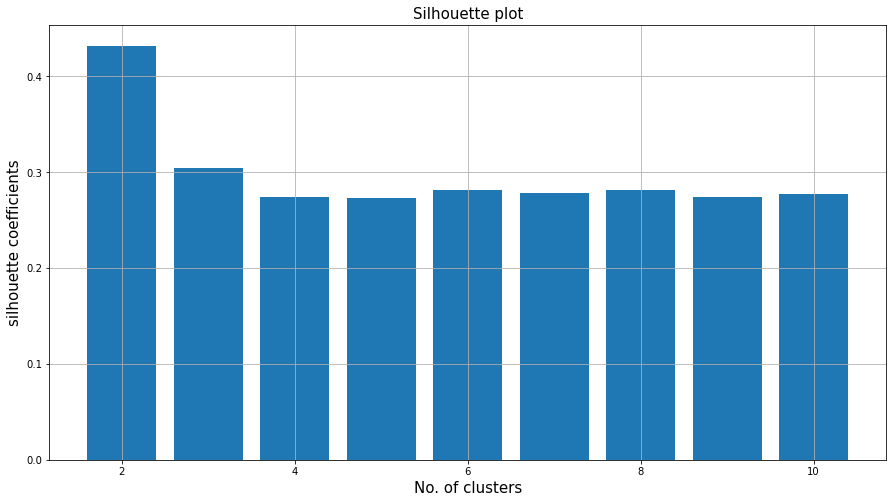

In [96]:
plt.figure(figsize=(15,8))
plt.bar(range(2,11),scores)
plt.title('Silhouette plot', fontsize = 15)
plt.xlabel('No. of clusters', fontsize = 15)
plt.ylabel('silhouette coefficients', fontsize = 15)
plt.grid()
plt.show()

### Optimum number of clusters is 2.

In [97]:
k3=KMeans(n_clusters=2,random_state=4)
k3.fit(dfs)

KMeans(n_clusters=2, random_state=4)

In [98]:
df2['labels']=k3.labels_
df2.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Payment,cogs,gross income,Rating,labels
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,Ewallet,522.83,26.1415,9.1,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,Cash,76.40,3.8200,9.6,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,Credit card,324.31,16.2155,7.4,0
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,Ewallet,465.76,23.2880,8.4,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,Ewallet,604.17,30.2085,5.3,1


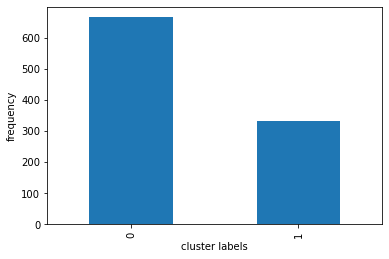

In [99]:
df2['labels'].value_counts().plot(kind="bar")
plt.xlabel("cluster labels")
plt.ylabel("frequency")
plt.show()

In [100]:
df2[df2['labels']==0].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,labels
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.0
mean,45.297447,4.325826,8.307023,174.447473,166.140450,8.307023,7.000300,0.0
std,24.354619,2.654064,4.799524,100.790003,95.990479,4.799524,1.689792,0.0
min,10.080000,1.000000,0.508500,10.678500,10.170000,0.508500,4.000000,0.0
25%,24.837500,2.000000,4.212000,88.452000,84.240000,4.212000,5.700000,0.0
50%,40.565000,4.000000,7.846500,164.776500,156.930000,7.846500,7.000000,0.0
75%,62.842500,6.000000,12.078000,253.638000,241.560000,12.078000,8.400000,0.0
max,99.890000,10.000000,18.639000,391.419000,372.780000,18.639000,10.000000,0.0


In [101]:
df2[df2['labels']==0].describe(include='object')

,Branch,City,Customer type,Gender,Product line,Month,Payment
count,666,666,666,666,666,666,666
unique,3,3,2,2,6,3,3
top,A,Yangon,Normal,Male,Food and beverages,3,Cash
freq,233,233,338,343,121,235,230


In [102]:
df2[df2['labels']==1].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,labels
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0
mean,76.359371,7.871257,29.481713,619.115964,589.634251,29.481713,6.917665,1.0
std,16.639323,1.782012,8.110401,170.318426,162.208024,8.110401,1.775886,0.0
min,36.980000,4.000000,18.308000,384.468000,366.160000,18.308000,4.000000,1.0
25%,64.107500,7.000000,22.445250,471.350250,448.905000,22.445250,5.325000,1.0
50%,77.655000,8.000000,27.967500,587.317500,559.350000,27.967500,6.900000,1.0
75%,90.522500,10.000000,35.476250,745.001250,709.525000,35.476250,8.500000,1.0
max,99.960000,10.000000,49.650000,1042.650000,993.000000,49.650000,10.000000,1.0


In [103]:
df2[df2['labels']==0].describe(include='object')

,Branch,City,Customer type,Gender,Product line,Month,Payment
count,666,666,666,666,666,666,666
unique,3,3,2,2,6,3,3
top,A,Yangon,Normal,Male,Food and beverages,3,Cash
freq,233,233,338,343,121,235,230


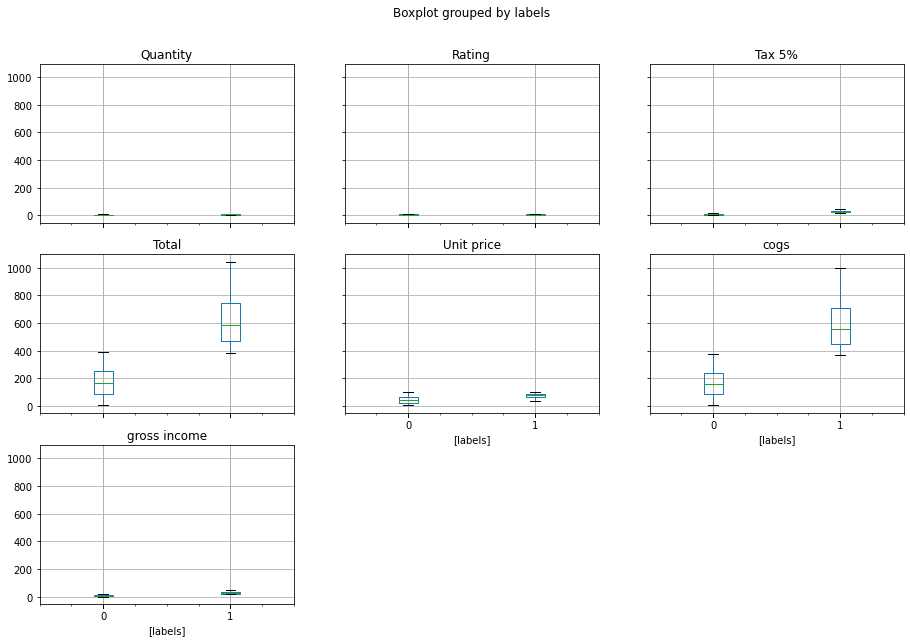

In [104]:
df2.boxplot(by="labels",figsize=(15,10))
plt.show()

## Agglomerative Clustering

In [105]:
beta={}
for a in ['single','complete','average','ward','centroid']:
    link_mat=linkage(dfs, method=a)
    eucli_dist=euclidean_distances(dfs)
    dist_array=eucli_dist[np.triu_indices(1000, k = 1)]
    coeff,cophenet_dist=cophenet(link_mat,dist_array)
    beta.update({a:coeff})
beta

{'single': 0.5207914480725927,
 'complete': 0.7176073476825237,
 'average': 0.7065081285506769,
 'ward': 0.5569704771703493,
 'centroid': 0.7050249885504789}

Text(0, 0.5, 'distances')

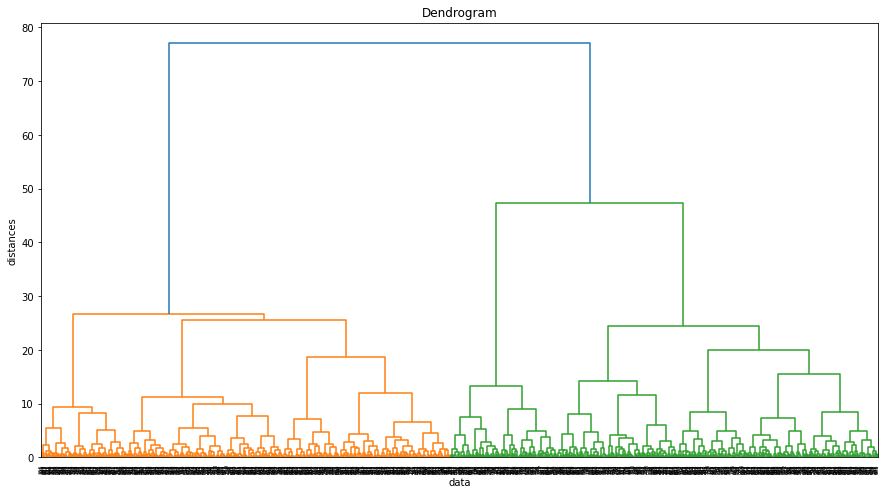

In [107]:
plt.figure(figsize=(15,8))
link_mat=linkage(dfs,method='ward')
dendrogram(link_mat)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('distances')

In [108]:
a1=AgglomerativeClustering(n_clusters=2,linkage='ward')
a1.fit(dfs)

AgglomerativeClustering()

In [109]:
df3=df2.drop('labels',axis=1)
df3.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,Ewallet,604.17,30.2085,5.3


In [110]:
df3['labels']=a1.labels_
df3.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Payment,cogs,gross income,Rating,labels
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1,Ewallet,522.83,26.1415,9.1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3,Cash,76.40,3.8200,9.6,1
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3,Credit card,324.31,16.2155,7.4,0
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1,Ewallet,465.76,23.2880,8.4,0
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2,Ewallet,604.17,30.2085,5.3,0


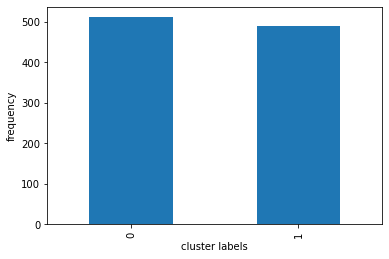

In [111]:
df3['labels'].value_counts().plot(kind="bar")
plt.xlabel("cluster labels")
plt.ylabel("frequency")
plt.show()

In [112]:
df3[df3['labels']==0].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,labels
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.0
mean,71.193777,6.927593,24.157947,507.316890,483.158943,24.157947,6.790411,0.0
std,18.914435,2.276186,9.940667,208.754001,198.813334,9.940667,1.731690,0.0
min,30.120000,2.000000,7.352000,154.392000,147.040000,7.352000,4.000000,0.0
25%,55.770000,5.000000,16.049250,337.034250,320.985000,16.049250,5.300000,0.0
50%,73.220000,7.000000,22.353000,469.413000,447.060000,22.353000,6.600000,0.0
75%,87.465000,9.000000,31.153250,654.218250,623.065000,31.153250,8.300000,0.0
max,99.960000,10.000000,49.650000,1042.650000,993.000000,49.650000,10.000000,0.0


In [113]:
df3[df3['labels']==0].describe(include='object')

,Branch,City,Customer type,Gender,Product line,Month,Payment
count,511,511,511,511,511,511,511
unique,3,3,2,2,6,3,3
top,A,Yangon,Member,Female,Food and beverages,1,Cash
freq,173,173,260,270,91,186,183


In [114]:
df3[df3['labels']==1].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,labels
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.0
mean,39.452168,4.028630,6.205845,130.322736,124.116892,6.205845,7.163190,1.0
std,23.392909,2.788883,3.515889,73.833672,70.317782,3.515889,1.685569,0.0
min,10.080000,1.000000,0.508500,10.678500,10.170000,0.508500,4.000000,1.0
25%,21.500000,2.000000,3.594000,75.474000,71.880000,3.594000,5.900000,1.0
50%,32.900000,3.000000,5.768000,121.128000,115.360000,5.768000,7.200000,1.0
75%,52.750000,6.000000,8.622500,181.072500,172.450000,8.622500,8.600000,1.0
max,99.890000,10.000000,18.975000,398.475000,379.500000,18.975000,10.000000,1.0


In [115]:
df3[df3['labels']==1].describe(include='object')

,Branch,City,Customer type,Gender,Product line,Month,Payment
count,489,489,489,489,489,489,489
unique,3,3,2,2,6,3,3
top,A,Yangon,Normal,Male,Fashion accessories,3,Ewallet
freq,167,167,248,258,96,170,170


## Principal Component Analysis and its application of clustering to determine it's performance

In [116]:
covmatrix=np.cov(dfs.T)
covmatrix

array([[ 1.001001  ,  0.01078835,  0.63459669,  0.63459669,  0.63459669,
         0.63459669, -0.00878629],
       [ 0.01078835,  1.001001  ,  0.7062164 ,  0.7062164 ,  0.7062164 ,
         0.7062164 , -0.01583074],
       [ 0.63459669,  0.7062164 ,  1.001001  ,  1.001001  ,  1.001001  ,
         1.001001  , -0.03647818],
       [ 0.63459669,  0.7062164 ,  1.001001  ,  1.001001  ,  1.001001  ,
         1.001001  , -0.03647818],
       [ 0.63459669,  0.7062164 ,  1.001001  ,  1.001001  ,  1.001001  ,
         1.001001  , -0.03647818],
       [ 0.63459669,  0.7062164 ,  1.001001  ,  1.001001  ,  1.001001  ,
         1.001001  , -0.03647818],
       [-0.00878629, -0.01583074, -0.03647818, -0.03647818, -0.03647818,
        -0.03647818,  1.001001  ]])

In [117]:
covmatrix.shape

(7, 7)

In [118]:
eig_val,eig_vec=np.linalg.eig(covmatrix)
eig_val

array([ 4.92672404e+00,  9.00968305e-02,  9.88784885e-01,  1.00140125e+00,
        1.71891701e-19, -1.57167389e-16, -9.61676887e-20])

In [119]:
eig_vec

array([[-2.91762749e-01, -6.00371612e-01, -6.93584569e-01,
        -2.70866890e-01,  1.33095300e-16, -4.12889884e-16,
         3.39399511e-17],
       [-3.24528799e-01, -6.69728769e-01,  6.33152868e-01,
         2.12748396e-01,  2.60464029e-16, -5.66920109e-16,
         1.27045323e-16],
       [-4.49779569e-01,  2.18351456e-01,  1.83620248e-03,
        -4.19635569e-03,  7.80720759e-01, -2.88527653e-01,
         1.92241243e-01],
       [-4.49779569e-01,  2.18351456e-01,  1.83620248e-03,
        -4.19635569e-03, -6.10156563e-01, -2.89097246e-01,
         6.09616620e-01],
       [-4.49779569e-01,  2.18351456e-01,  1.83620248e-03,
        -4.19635569e-03, -1.27931786e-01,  8.66025285e-01,
        -3.35579568e-02],
       [-4.49779569e-01,  2.18351456e-01,  1.83620248e-03,
        -4.19635569e-03, -4.26324097e-02, -2.88400386e-01,
        -7.68299906e-01],
       [ 1.86792619e-02,  1.75462119e-02,  3.43575909e-01,
        -9.38775165e-01,  7.02855082e-17,  7.79408857e-17,
         1.0796349

In [120]:
eig_val=list(eig_val)
eig_val.sort(reverse=True)
print(eig_val)

[4.9267240396051, 1.0014012521553735, 0.9887848847877841, 0.0900968304587531, 1.7189170089009336e-19, -9.616768867678469e-20, -1.5716738923749388e-16]


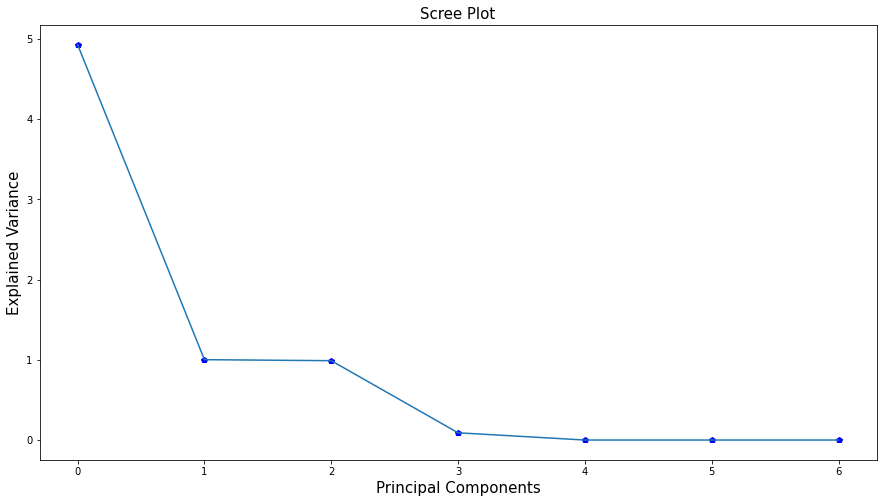

In [121]:
plt.figure(figsize=(15,8))
plt.plot(eig_val,'bp')            
plt.plot(eig_val) 
plt.title('Scree Plot',fontsize = 15)
plt.xlabel('Principal Components',fontsize = 15)    
plt.ylabel('Explained Variance',fontsize = 15)      
plt.show()

In [122]:
pervar=[]
for i in eig_val:
    variation=(i/sum(eig_val))*100
    pervar.append(variation)
pervar

[70.31139022236417,
 14.291426441474536,
 14.111372855757084,
 1.285810480404204,
 2.453140131274331e-18,
 -1.372450299830112e-18,
 -2.2430031692608044e-15]

In [123]:
cum=np.cumsum(pervar)
cum

array([ 70.31139022,  84.60281666,  98.71418952, 100.        ,
       100.        , 100.        , 100.        ])

In [126]:
pca1=PCA(n_components=3,random_state=4)
comp1=pca1.fit_transform(dfs)
dfpca1=pd.DataFrame(data=comp1,columns=['PCA1','PCA2','PCA3'])
dfpca1.head()

,PCA1,PCA2,PCA3
0,2.006368,1.264095,0.257013
1,-2.307283,1.043281,1.465670
2,0.186452,0.030685,0.653540
3,1.504910,0.636161,0.763268
4,2.800943,-0.688006,-0.804849


In [127]:
wcss2=[]
for i in range(1,11):
    k4=KMeans(n_clusters=i,random_state=4)
    k4.fit(dfpca1)
    wcss2.append(k4.inertia_)

In [128]:
pd.DataFrame({'clusters':range(10),'errors':wcss2})

,clusters,errors
0,0,6909.993266
1,1,3363.919550
2,2,2624.932818
3,3,2159.476314
4,4,1862.342995
5,5,1631.104992
6,6,1453.293258
7,7,1303.282236
8,8,1203.622474
9,9,1096.371905


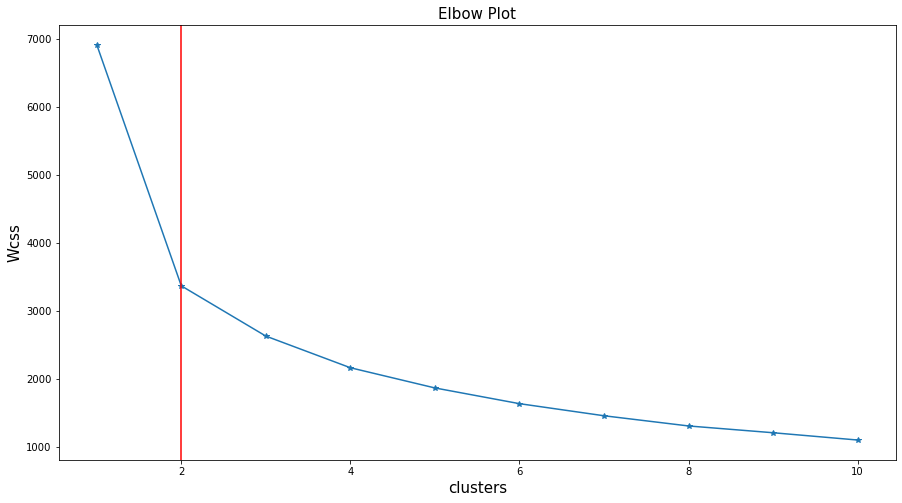

In [130]:
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss2,marker="*")
plt.title('Elbow Plot',fontsize = 15)
plt.xlabel('clusters',fontsize = 15)
plt.ylabel('Wcss',fontsize = 15)
plt.axvline(2,color='red')
plt.show()

In [131]:
scrange=range(2,11)
for i in scrange:
    k5=KMeans(n_clusters=i,random_state=4,n_init=10)
    l1=k5.fit(dfpca1)
    l11=k5.labels_
    score1=silhouette_score(dfpca1,l11,random_state=4)
    print("For {} clusters the silhouette score is {}".format(i,score1))

For 2 clusters the silhouette score is 0.43726875814126037
For 3 clusters the silhouette score is 0.3094770309883794
For 4 clusters the silhouette score is 0.27708901853116397
For 5 clusters the silhouette score is 0.27100965311060504
For 6 clusters the silhouette score is 0.28492851619358656
For 7 clusters the silhouette score is 0.27744608373909124
For 8 clusters the silhouette score is 0.28166112079873296
For 9 clusters the silhouette score is 0.2749753594586298
For 10 clusters the silhouette score is 0.28084415986845773


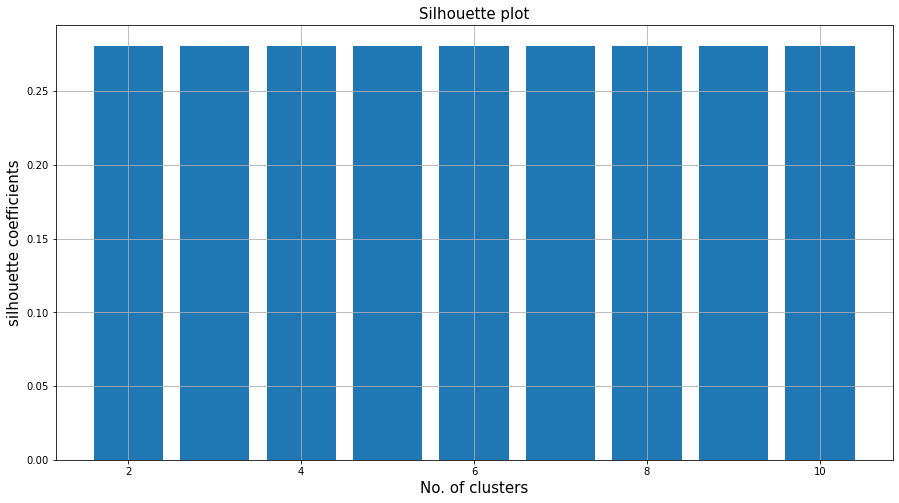

In [132]:
plt.figure(figsize=(15,8))
plt.bar(range(2,11),score1)
plt.title('Silhouette plot', fontsize = 15)
plt.xlabel('No. of clusters', fontsize = 15)
plt.ylabel('silhouette coefficients', fontsize = 15)
plt.grid()
plt.show()

In [133]:
k6=KMeans(n_clusters=2,random_state=4)
k6.fit(dfpca1)

KMeans(n_clusters=2, random_state=4)

In [134]:
dfpca1['labels']=k6.labels_
dfpca1.head()

,PCA1,PCA2,PCA3,labels
0,2.006368,1.264095,0.257013,1
1,-2.307283,1.043281,1.465670,0
2,0.186452,0.030685,0.653540,0
3,1.504910,0.636161,0.763268,1
4,2.800943,-0.688006,-0.804849,1


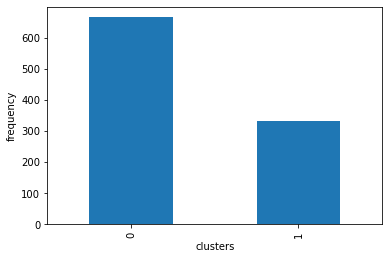

In [135]:
dfpca1['labels'].value_counts().plot(kind="bar")
plt.xlabel("clusters")
plt.ylabel("frequency")
plt.show()

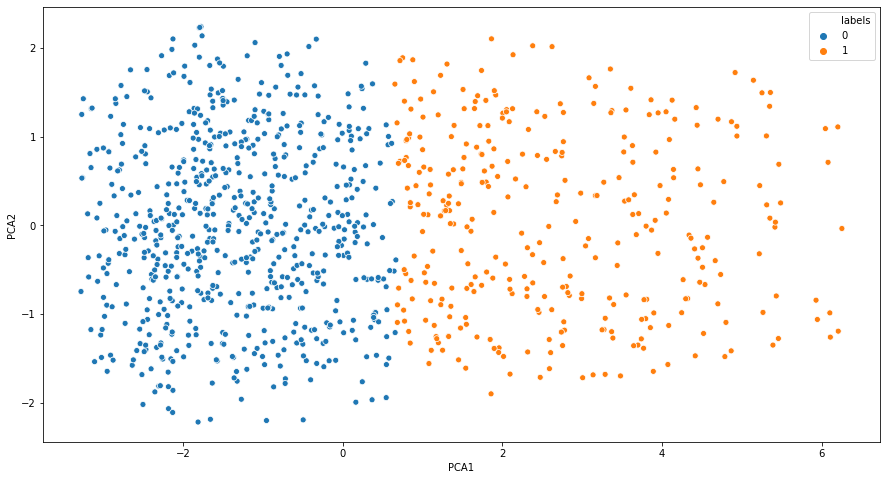

In [136]:
plt.figure(figsize=(15,8))
sns.scatterplot(dfpca1['PCA1'],dfpca1['PCA2'],hue=dfpca1['labels'])
plt.show()

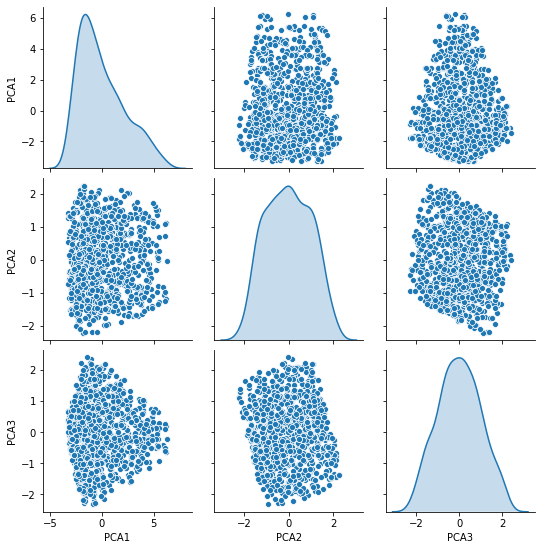

In [137]:
sns.pairplot(dfpca1.drop('labels',axis=1),diag_kind='kde')
plt.show()

In [138]:
from sklearn.model_selection import train_test_split

In [150]:
x=dfs
y=df2['labels']
xtrainorg,xtestorg,ytrainorg,ytestorg=train_test_split(x,y,test_size=0.3,random_state=4)
print('x_train_original:',xtrainorg.shape)
print('y_train_original:',ytrainorg.shape)
print('x_test_original:',xtestorg.shape)
print('y_test_original:',ytestorg.shape)

x_train_original: (700, 7)
y_train_original: (700,)
x_test_original: (300, 7)
y_test_original: (300,)


In [151]:
rf1=RandomForestClassifier(random_state=4)
rf1.fit(xtrainorg,ytrainorg)
ypredorg=rf1.predict(xtestorg)
ypredprob=rf1.predict_proba(xtestorg)[:,1]
print("Accuracy value for test data",accuracy_score(ytestorg,ypredorg))
print("ROC AUC value for test data",roc_auc_score(ytestorg,ypredprob))

Accuracy value for test data 0.9966666666666667
ROC AUC value for test data 1.0


In [152]:
x=dfs
y=df3['labels']
xtrainorg,xtestorg,ytrainorg,ytestorg=train_test_split(x,y,test_size=0.3,random_state=4)
print('x_train_original:',xtrainorg.shape)
print('y_train_original:',ytrainorg.shape)
print('x_test_original:',xtestorg.shape)
print('y_test_original:',ytestorg.shape)

x_train_original: (700, 7)
y_train_original: (700,)
x_test_original: (300, 7)
y_test_original: (300,)


In [153]:
rf1=RandomForestClassifier(random_state=4)
rf1.fit(xtrainorg,ytrainorg)
ypredorg=rf1.predict(xtestorg)
ypredprob=rf1.predict_proba(xtestorg)[:,1]
print("Accuracy value for test data",accuracy_score(ytestorg,ypredorg))
print("ROC AUC value for test data",roc_auc_score(ytestorg,ypredprob))

Accuracy value for test data 0.94
ROC AUC value for test data 0.9872838024098529


In [163]:
x1=dfpca1.drop('labels',axis=1)
y1=dfpca1['labels'] ## KMeans and pca labels are giving accuracy of 1. hence using agglomerative labels to evaluate pca performance.
xtrainpca,xtestpca,ytrainpca,ytestpca=train_test_split(x1,y1,test_size=0.3,random_state=4)
print('x_train_pca:',xtrainpca.shape)
print('y_train_pca:',ytrainpca.shape)
print('x_test_pca:',xtestpca.shape)
print('y_test_pca:',ytestpca.shape)

x_train_pca: (700, 3)
y_train_pca: (700,)
x_test_pca: (300, 3)
y_test_pca: (300,)


In [164]:
rf2=RandomForestClassifier(random_state=4)
rf2.fit(xtrainpca,ytrainpca)
ypredpca=rf2.predict(xtestpca)
ypredprobpca=rf2.predict_proba(xtestpca)[:,1]
print("Accuracy value for test data",accuracy_score(ytestpca,ypredpca))
print("ROC AUC value for test data",roc_auc_score(ytestpca,ypredprobpca))

Accuracy value for test data 1.0
ROC AUC value for test data 1.0


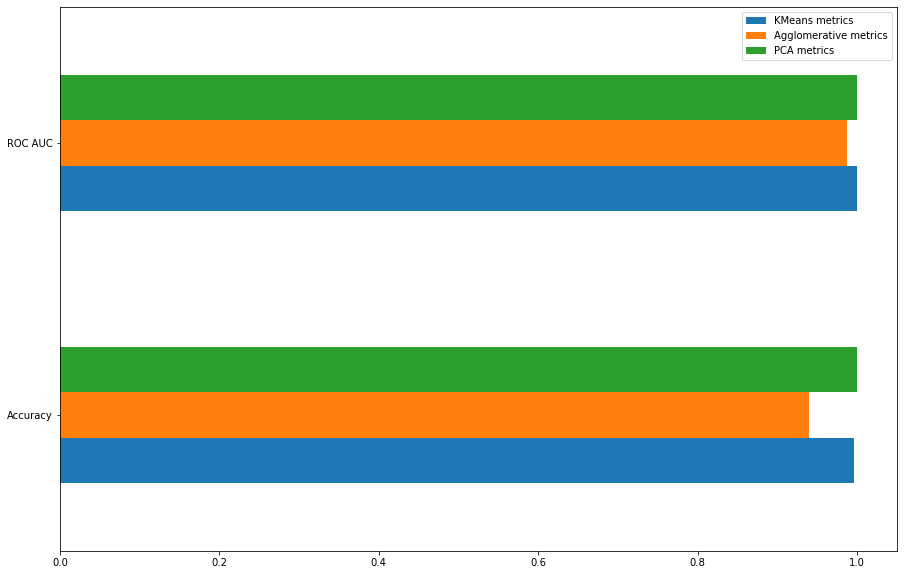

In [165]:
pd.DataFrame({'KMeans metrics':[0.9966666666666667,1],'Agglomerative metrics':[0.94,0.9872838024098529],'PCA metrics':[1,1]},index=['Accuracy','ROC AUC']).plot(kind='barh',figsize=(15,10))

## Agglomeraive Model gives better performance with respect to accuracy and roc auc scores.